# Analyzing the Orthodont dataset using lgpr
Here we analyse the `Orthodont` dataset (Pinheiro and Bates, 2000).

In [7]:
require(lgpr)
require(repr)
require(ggplot2)
require(nlme) # the Orthodont data is in this package

The data consists of orthodontic growth measurements for 11 female and 16 male subjects from age 8 to 14.

  distance age Subject Sex
1     26.0   8      15   1
2     25.0  10      15   1
3     29.0  12      15   1
4     31.0  14      15   1
5     21.5   8       3   1
6     22.5  10       3   1


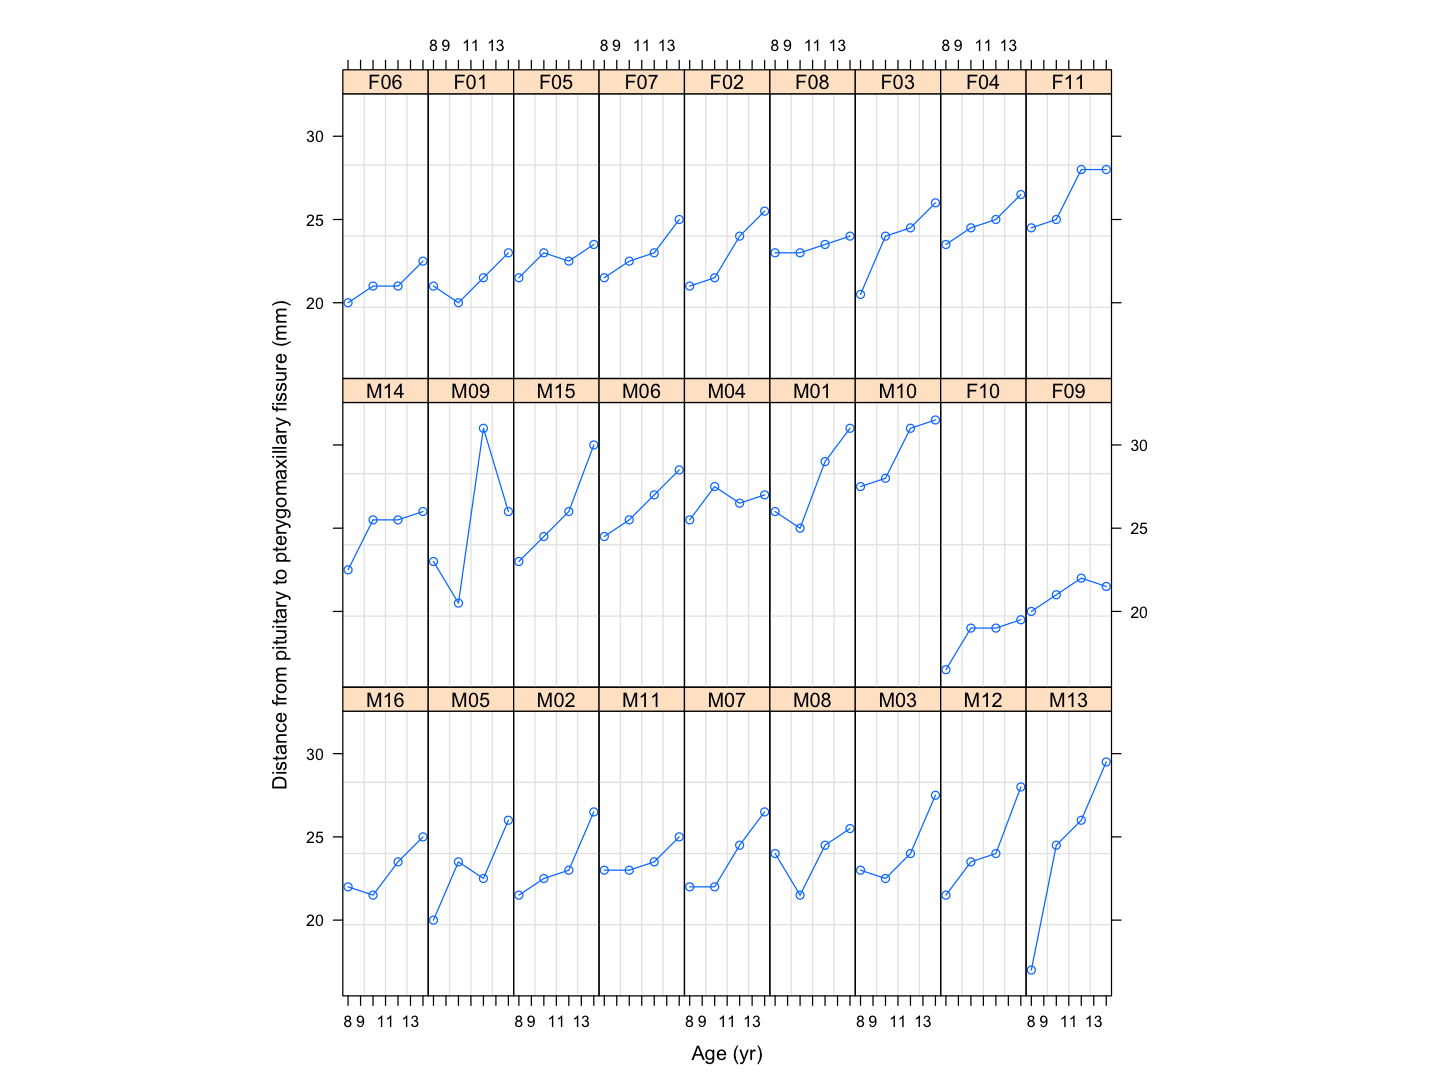

In [2]:
options(repr.plot.width=12, repr.plot.height=9)
plot(Orthodont)
data <- as.data.frame(Orthodont)
data$Sex <- as.numeric(data$Sex)
data$Subject <- as.numeric(data$Subject)
print(head(data))

We fit a model with `Subject`, `Days` and `age` as predictors for `distance`.

In [3]:
fit <- lgp(distance ~ Subject + age + Sex,
           data = data,
           time_variable = "age",
           id_variable = "Subject",
           iter = 1000,
           chains = 1,
           refresh = 0,
           verbose = TRUE)


* Covariate 'Sex' resolved to type 'categorical'.

 ---------- LGPMODEL SUMMARY ----------

  Model:
    f = f[(1)](Subject, age) + f[(2)](age) + f[(3)](Sex, age)
    Response variable: distance
    Observation model: Gaussian 
  Variable types:
    - Identifier variable: Subject
    - Time variable: age
    - Other categorical variables: Sex
  Observation model: Gaussian

 ---------- PRIOR SPECIFICATIONS ----------

  alpha_id ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_age ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_categAge ~ Student-t(nu=20,mu=0,sigma=1)

  ell_id ~ Log-Normal(0,1.151)
  ell_age ~ Log-Normal(0,1.151)
  ell_categAge ~ Log-Normal(0,1.151)

  (sigma_n)^2 ~ Log-Normal(0,1)

 
* Observation model = 1
* Number of data points = 108
* Number of model components = 3
* Number of individuals = 27
* Additional model info:
  - D = [1,1,0,0,1,0]
  - F_IS_SAMPLED = 0
 
* Begin postprocessing. 
* Computing relevances over 500 posterior samples.

* The following components explain 100% of 

We can study the inferred effects of each covariate. 

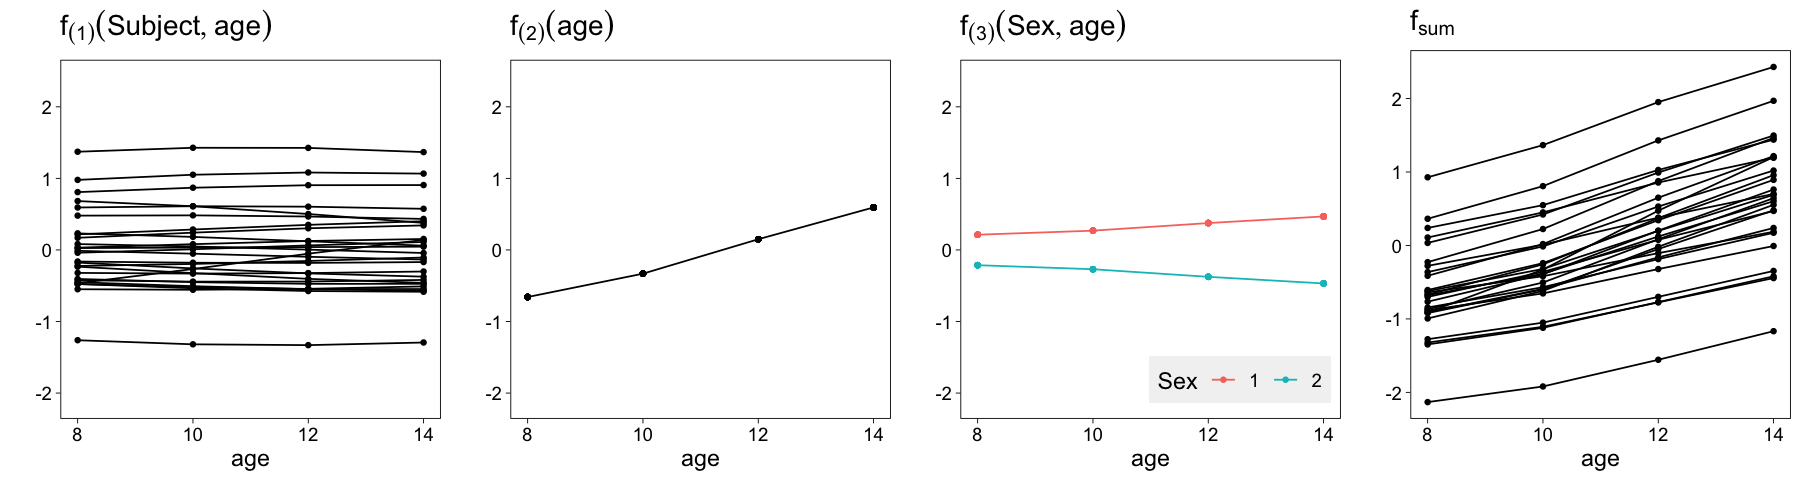

In [4]:
options(repr.plot.width=15, repr.plot.height=4) 
plot_components_posterior(fit, nrow = 1, ncol = 4, font_size = 14)

We see that the common time effect is quite linearly increasing, and female subjects (Sex=1) seem to have a generally higher growth level. We can visualize the posterior distribution of the sum of all components (red line = mean, ribbon edges = $\pm$ 2 x standard deviation), with the observations (black dots).

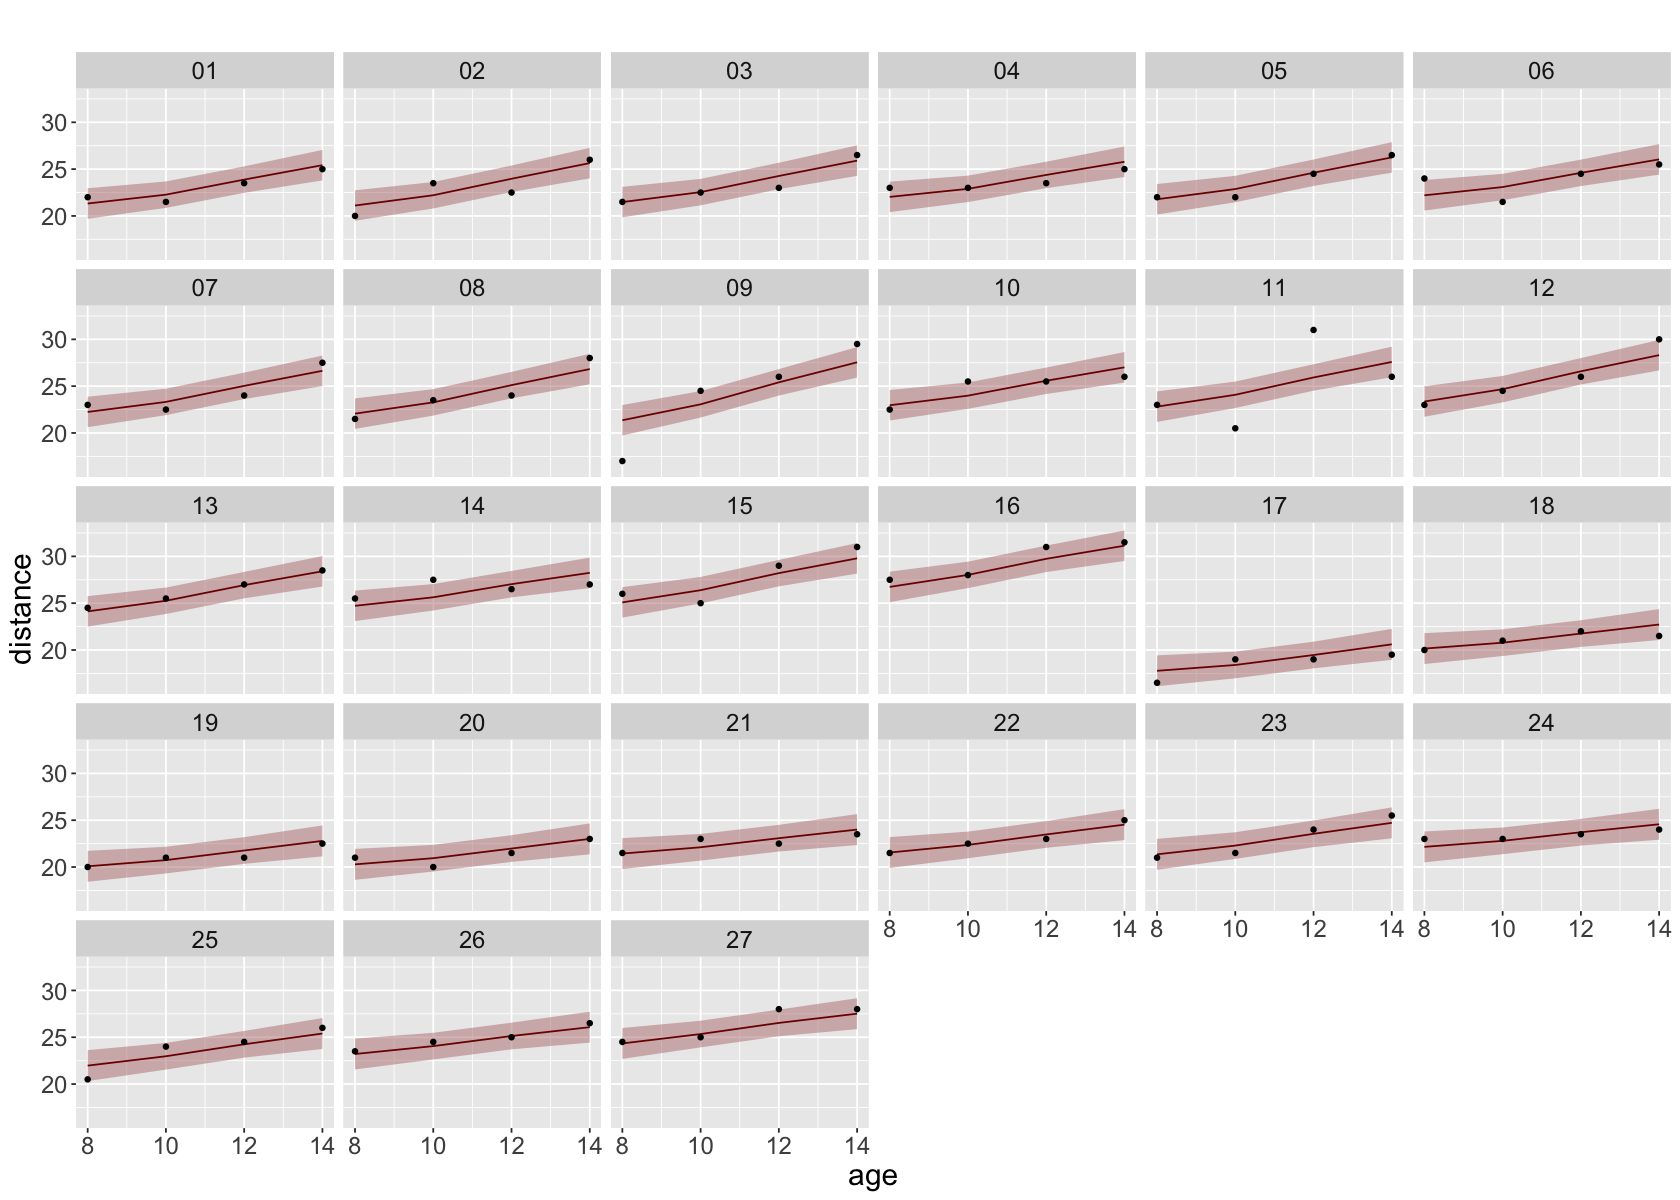

In [5]:
options(repr.plot.width=14, repr.plot.height=10)
plot_posterior_f(fit) + theme(text=element_text(size=18))

In [6]:
# check that Subjects 1-16 are female and subjects 17-27 are male
print(data)

    distance age Subject Sex
1       26.0   8      15   1
2       25.0  10      15   1
3       29.0  12      15   1
4       31.0  14      15   1
5       21.5   8       3   1
6       22.5  10       3   1
7       23.0  12       3   1
8       26.5  14       3   1
9       23.0   8       7   1
10      22.5  10       7   1
11      24.0  12       7   1
12      27.5  14       7   1
13      25.5   8      14   1
14      27.5  10      14   1
15      26.5  12      14   1
16      27.0  14      14   1
17      20.0   8       2   1
18      23.5  10       2   1
19      22.5  12       2   1
20      26.0  14       2   1
21      24.5   8      13   1
22      25.5  10      13   1
23      27.0  12      13   1
24      28.5  14      13   1
25      22.0   8       5   1
26      22.0  10       5   1
27      24.5  12       5   1
28      26.5  14       5   1
29      24.0   8       6   1
30      21.5  10       6   1
31      24.5  12       6   1
32      25.5  14       6   1
33      23.0   8      11   1
34      20.5  

## References 
Pinheiro, J.C. and Bates, D. (2000). *Mixed-Effects Models in S and S-PLUS*. Springer, New York.